# <font color=blue>Assignments for "Data Cleaning - Outliers"</font>

In this assignment, you continue to study the data of the `US Education System`. Again, please down it from here ([dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

First of all, apply the most appropriate one of the techniques for completing the missing values in your previous lesson. In order to answer the following questions, you must overcome the missing data.

In [3]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype

states = pd.read_csv("E:/user/Notebooks/data/states_all.csv")
states.drop(states[states.YEAR < 1991].index, inplace=True)
states.drop(states[states.YEAR > 2016].index, inplace=True)
#diğer tarihlerde çok fazla null var drop ettim.

def fix_missing(df, col, name):
    if is_numeric_dtype(col):
        df[name] = col.fillna(col.median())
        
for name, col in states.items():
    fix_missing(states, col, name)

**(1)** See `TOTAL_REVENUE`, which includes total revenue data, and `TOTAL_EXPENDITURE`, which includes total spending data. Do these variables contain outliers?

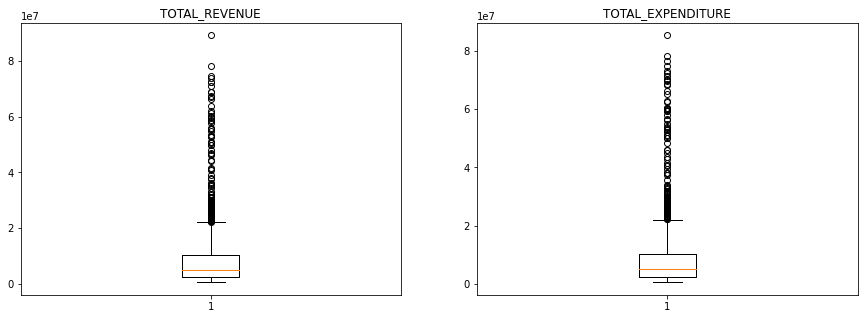

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(states["TOTAL_REVENUE"])
plt.title("TOTAL_REVENUE")

plt.subplot(1,2,2)
plt.boxplot(states["TOTAL_EXPENDITURE"])
plt.title("TOTAL_EXPENDITURE")
plt.show()


**(2)** If you find outliers in the total income `TOTAL_REVENUE` and total expenditure `TOTAL_EXPENDITURE` variables, eliminate these outliers by applying the techniques you learned in this lesson and verify that no outliers remain after doing this.

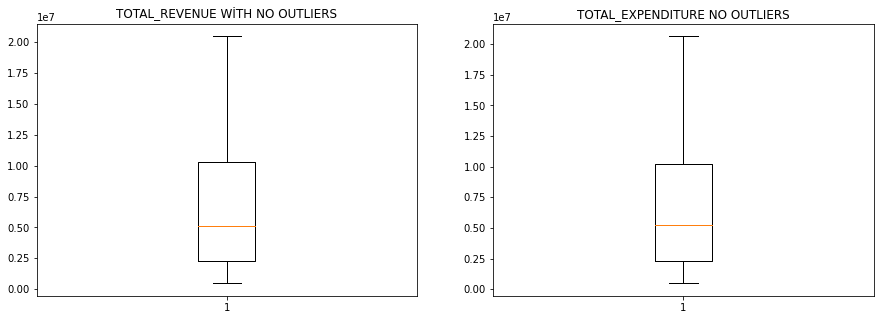

In [49]:
from scipy.stats.mstats import winsorize

winsorizing_rev= winsorize(np.array(states.TOTAL_REVENUE.dropna()), (0, 0.1))
winsorizing_ex=winsorize(np.array(states.TOTAL_EXPENDITURE.dropna()), (0, 0.1))

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.boxplot(winsorizing_rev)
plt.title("TOTAL_REVENUE WİTH NO OUTLIERS")

plt.subplot(1,2,2)
plt.boxplot(winsorizing_ex)
plt.title("TOTAL_EXPENDITURE NO OUTLIERS")
plt.show()

**(3)** Subtract the total expenditure `TOTAL_EXPENDITURE` from the total income variable `TOTAL_REVENUE` to create a variable that can be considered as a budget deficit (without failing to contradict the outliers). Are there any outliers in this new variable? If any, clear these outliers.

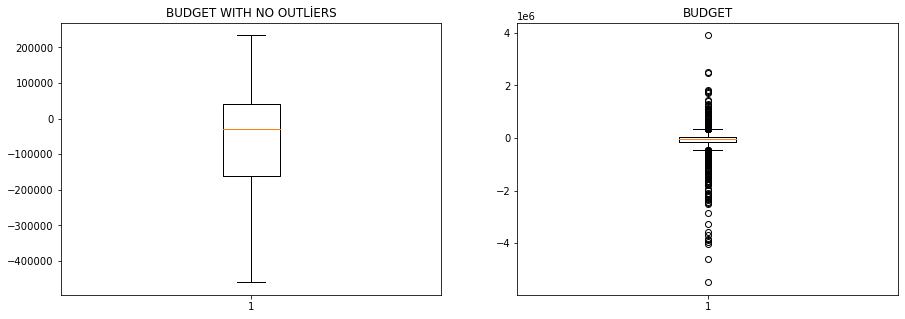

In [50]:
states['budget']=states['TOTAL_REVENUE']-states['TOTAL_EXPENDITURE']

winsorizing_bud=winsorize(np.array(states.budget.dropna()), (0.1, 0.1))


plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.boxplot(winsorizing_bud)
plt.title("BUDGET WITH NO OUTLİERS")

plt.subplot(1,2,2)
plt.boxplot(states['budget'])
plt.title("BUDGET")
plt.show()

**(4)** Again create a variable that can be considered as a budget deficit by subtracting the total income `TOTAL_REVENUE` variable from the total expenditure `TOTAL_EXPENDITURE`. But this time, after clearing the outliers, do this. Are there any outliers in this new variable? It is useful to clean them, if any.

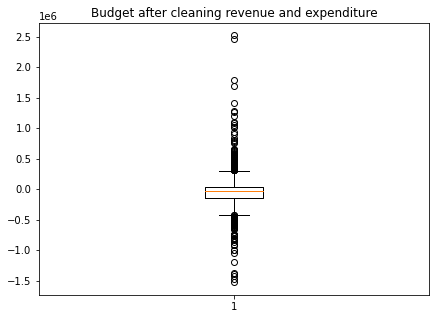

In [51]:
plt.figure(figsize = (7,5))
plt.boxplot(winsorizing_rev-winsorizing_ex)
plt.title("Budget after cleaning revenue and expenditure");


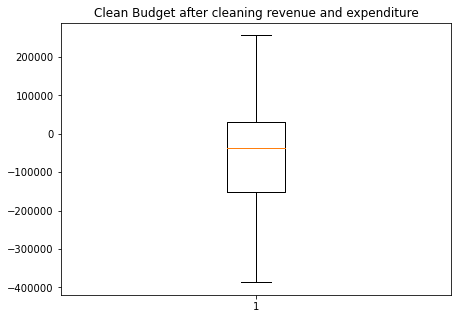

In [61]:
stat=states.copy()
stat['budget']=winsorizing_rev-winsorizing_ex
winsorizing_bud2=winsorize(np.array(stat.budget.dropna()), (0.06, 0.07))

plt.figure(figsize = (7,5))
plt.boxplot(winsorizing_bud2)
plt.title("Clean Budget after cleaning revenue and expenditure");

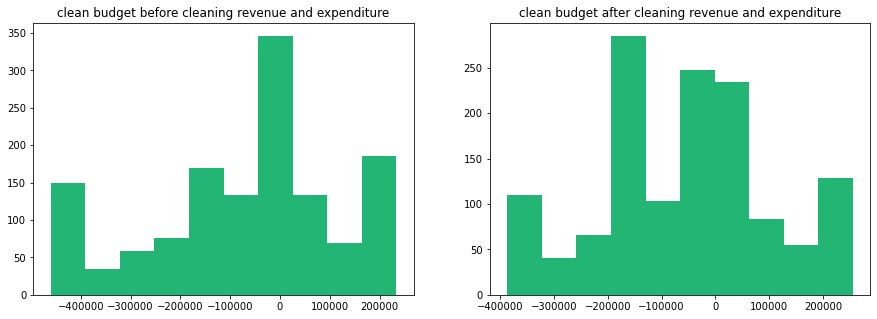

In [62]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.hist(winsorizing_bud, color="#22B573") 
plt.title('clean budget before cleaning revenue and expenditure')

plt.subplot(1,2,2)
plt.hist(winsorizing_bud2, color="#22B573") 
plt.title('clean budget after cleaning revenue and expenditure');

**(5)** Now, we have two different budget variables that we have created in the third and fourth questions. Do you see the difference between these two?

yes, there are differences between these two 

**(6)** If the budget deficit was a very important variable for us, which method would be better to clear out contrary values. Is it the method you applied in the third question or the method in the fourth question?

the method applied in third question is better